#### Preparation instructions: 
Install the following libraries: <br>
pip install matplotlib<br>
pip install yfinance<br>
pip install ipywidgets<br>
conda install -c conda-forge ta-lib <br>
In order to install ta-lib follow the instruction on: <a href="https://blog.quantinsti.com/install-ta-lib-python/">Installation instruction ta-lib.</a>
<hr />
Install mplfinance for the engulfing pattern chart.

#### Libraries declaration

In [35]:
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import ipywidgets as widgets
import mplfinance as mpf 

#### Widgets and variables declaration

In [72]:
# Widgets creation
w_end_date = widgets.DatePicker(
    value=dt.datetime.now().date(),
    disabled=False
)

w_backwards_days = widgets.IntText(value=0)

w_start_date = widgets.DatePicker(
    value=w_end_date.value - dt.timedelta(days=int(w_backwards_days.value)) if w_backwards_days.value else None
)

# Logic to update backwards_days and end_date
## Define the DatePicker widget for start_date with initial value set based on backwards_days
def update_start_date(change):
    back_days = int(w_backwards_days.value)  # Retrieve the numerical value entered
    w_start_date.value = w_end_date.value - dt.timedelta(days=back_days)
    
## Define a function to update backwards_days based on start_date changes
def update_backwards_days(change):
    delta = w_end_date.value - w_start_date.value
    w_backwards_days.value = delta.days
    
## Observe changes in backwards_days and end_date and update it accordingly
w_backwards_days.observe(update_start_date, 'value')
w_start_date.observe(update_backwards_days, 'value')
w_end_date.observe(update_backwards_days, 'value')

# Creation of boxes to be shown 
## Create HBox containers with labels and widgets
box_start_date = widgets.HBox([widgets.Label("Starting date:"), w_start_date])
box_end_date = widgets.HBox([widgets.Label("Ending date:"), w_end_date])
box_backwards_days = widgets.HBox([widgets.Label("Backward days:"), w_backwards_days])

## Combine both HBox containers into a single HBox to display them together
combined_box = widgets.HBox([box_start_date, box_end_date, box_backwards_days])

display(combined_box)

In [73]:
# Variables creation
start_date = w_start_date.value
backwards_days = w_backwards_days.value
end_date = w_end_date.value
print(f"start_date: {start_date}, end_date: {end_date}, backwards_days: {backwards_days}")

start_date: 2024-05-17, end_date: 2024-08-25, backwards_days: 100


#### Reading data

In [74]:
stock_movs = yf.download('AAPL', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [75]:
stock_movs

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.650482,41282900
2024-05-20,189.330002,191.919998,189.009995,191.039993,190.819122,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.127625,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.679291,34648500
2024-05-23,190.979996,191.000000,186.630005,186.880005,186.663940,51005900
...,...,...,...,...,...,...
2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800
2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000
2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500


### Simple Moving Average (SMA)

In [76]:
w_toggle_sma = widgets.ToggleButtons(
    options=['SMA_50', 'SMA_100', 'SMA_200'],
    value= 'SMA_100'
)

w_other_sma = widgets.IntText(value=0)

box_other_sma = widgets.HBox([widgets.Label("Other SMA:"), w_other_sma])

# Function to clear ToggleButtons selection when Other SMA input changes
def clear_toggle_selection(change):
    if change['type'] == 'change' and change['name'] == 'value' and change['new'] != 0:
        w_toggle_sma.value = None

# Function to update w_other_sma when other SMA is set
def update_other_sma(change):
    if change['type'] == 'change' and change['name'] == 'value' and change['new']:
        w_other_sma.value = 0

# Observe changes
w_toggle_sma.observe(update_other_sma)
w_other_sma.observe(clear_toggle_selection)

# Combine them in a layout
combined_box_sma = widgets.HBox([w_toggle_sma, box_other_sma])

display(combined_box_sma)

In [77]:
# Read the widget value and calculate the SMA
sma_value = int(w_toggle_sma.value[4:]) if w_other_sma.value==0 else w_other_sma.value
stock_movs[f"SMA_{sma_value}"] = ta.SMA(stock_movs["Close"], sma_value)

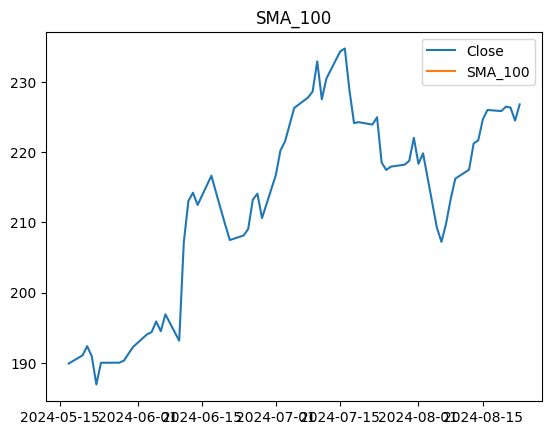

In [78]:
plt.title(f"SMA_{sma_value}")
plt.plot(stock_movs["Close"], label='Close')
plt.plot(stock_movs[f"SMA_{sma_value}"], label=f"SMA_{sma_value}")
plt.legend()

### Exponential Moving Average (EMA)

In [79]:
w_toggle_ema = widgets.ToggleButtons(
    options=["EMA_12", "EMA_26"],
    value= "EMA_12"
)

w_other_ema = widgets.IntText(value=0)

box_other_ema = widgets.HBox([widgets.Label("Other EMA:"), w_other_ema])

# Function to clear ToggleButtons selection when Other EMA input changes
def clear_toggle_selection(change):
    if change["type"] == "change" and change["name"] == "value" and change["new"] != 0:
        w_toggle_ema.value = None

# Function to update w_other_ema when other EMA is set
def update_other_ema(change):
    if change["type"] == "change" and change["name"] == "value" and change["new"]:
        w_other_ema.value = 0

# Observe changes
w_toggle_ema.observe(update_other_ema)
w_other_ema.observe(clear_toggle_selection)

# Combine them in a layout
combined_box_ema = widgets.HBox([w_toggle_ema, box_other_ema])

display(combined_box_ema)

In [80]:
# Read the widget value and calculate the EMA
ema_value = int(w_toggle_ema.value[4:]) if w_other_ema.value==0 else w_other_ema.value
stock_movs[f"EMA_{ema_value}"] = ta.EMA(stock_movs["Close"], ema_value)

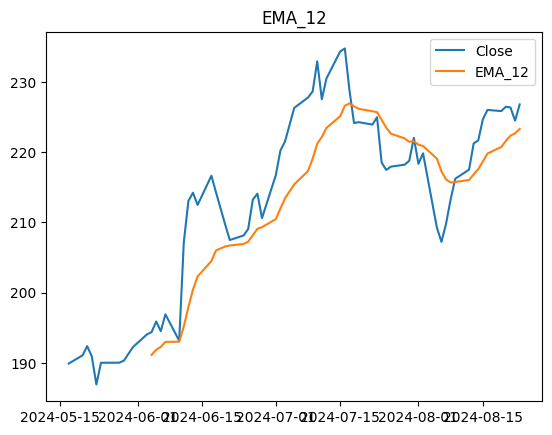

In [81]:
plt.title(f"EMA_{ema_value}")
plt.plot(stock_movs["Close"], label='Close')
plt.plot(stock_movs[f"EMA_{ema_value}"], label=f"EMA_{ema_value}")
plt.legend()

### Relative Strength Index (RSI)

In [82]:
w_toggle_rsi = widgets.ToggleButtons(
    options=["RSI_7", "RSI_9", "RSI_10", "RSI_14", "RSI_21", "RSI_28"],
    value= "RSI_14"
)

w_other_rsi = widgets.IntText(value=0)

box_other_rsi = widgets.HBox([widgets.Label("Other RSI:"), w_other_rsi])

# Function to clear ToggleButtons selection when Other RSI input changes
def clear_toggle_selection(change):
    if change["type"] == "change" and change["name"] == "value" and change["new"] != 0:
        w_toggle_rsi.value = None

# Function to update w_other_rsi when other RSI is set
def update_other_rsi(change):
    if change["type"] == "change" and change["name"] == "value" and change["new"]:
        w_other_rsi.value = 0

# Observe changes
w_toggle_rsi.observe(update_other_rsi)
w_other_rsi.observe(clear_toggle_selection)

# Combine them in a layout
combined_box_rsi = widgets.HBox([w_toggle_rsi, box_other_rsi])

display(combined_box_rsi)

In [83]:
# Read the widget value and calculate the RSI
rsi_value = int(w_toggle_rsi.value[4:]) if w_other_rsi.value==0 else w_other_rsi.value
stock_movs[f"RSI_{rsi_value}"] = ta.RSI(stock_movs["Close"], rsi_value)

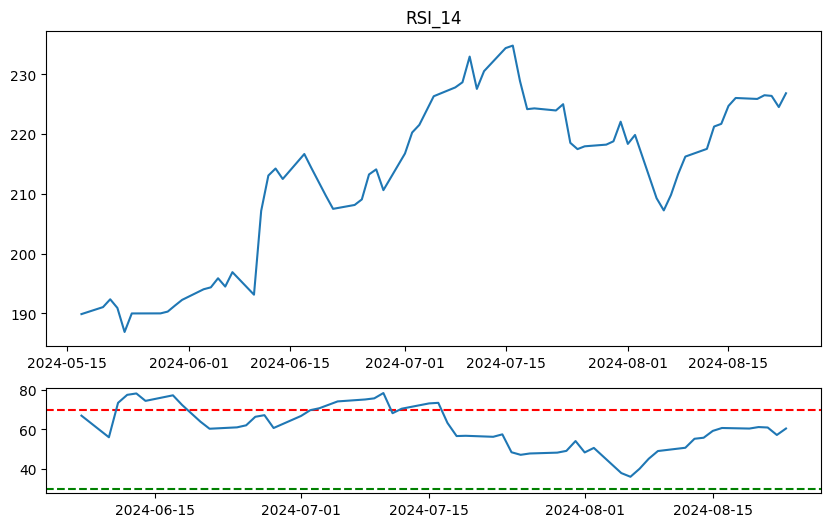

In [84]:
fig, axs = plt.subplots(
    2, 
    1, 
    gridspec_kw = {"height_ratios": [3, 1]},
    figsize = (10, 6)
)

axs[0].plot(stock_movs["Close"])
axs[0].set_title(f"RSI_{rsi_value}")
axs[1].axhline(y= 70, color= "r", linestyle= "--")
axs[1].axhline(y= 30, color= "g", linestyle= "--")
axs[1].plot(stock_movs[f"RSI_{rsi_value}"])

### Moving Average Convergence Divergence (MACD)

In [85]:
macd, macd_signal, macd_hist = ta.MACD(stock_movs["Close"])

<BarContainer object of 68 artists>

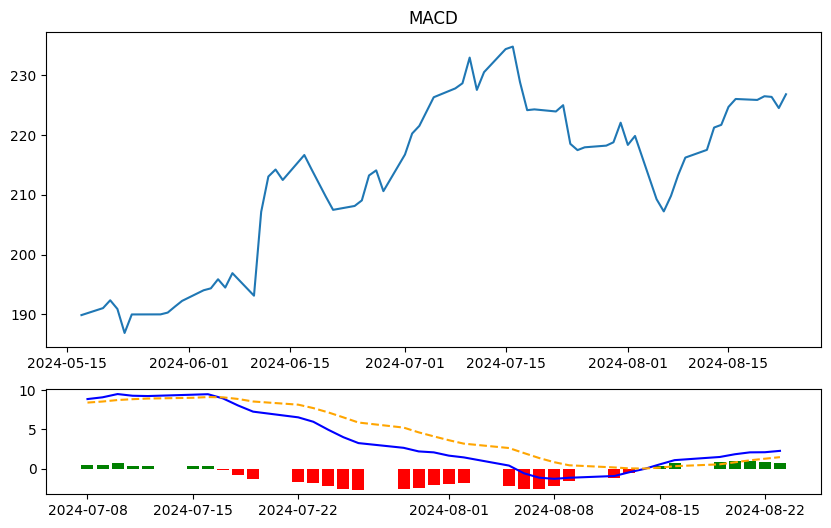

In [86]:
fig, axs = plt.subplots(
    2, 
    1, 
    gridspec_kw = {"height_ratios": [3, 1]},
    figsize = (10, 6)
)
c= ["red" if cl <0 else "green" for cl in macd_hist]
axs[0].plot(stock_movs["Close"])
axs[0].set_title(f"MACD")
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--', color="orange")
axs[1].bar(macd_hist.index, macd_hist, color=c)
## I may buy when green and sell when red.

### Engulfing pattern 

In [87]:
stock_movs["Engulfing"] = ta.CDLENGULFING(
    stock_movs["Open"], 
    stock_movs["High"], 
    stock_movs["Low"], 
    stock_movs["Close"]
)

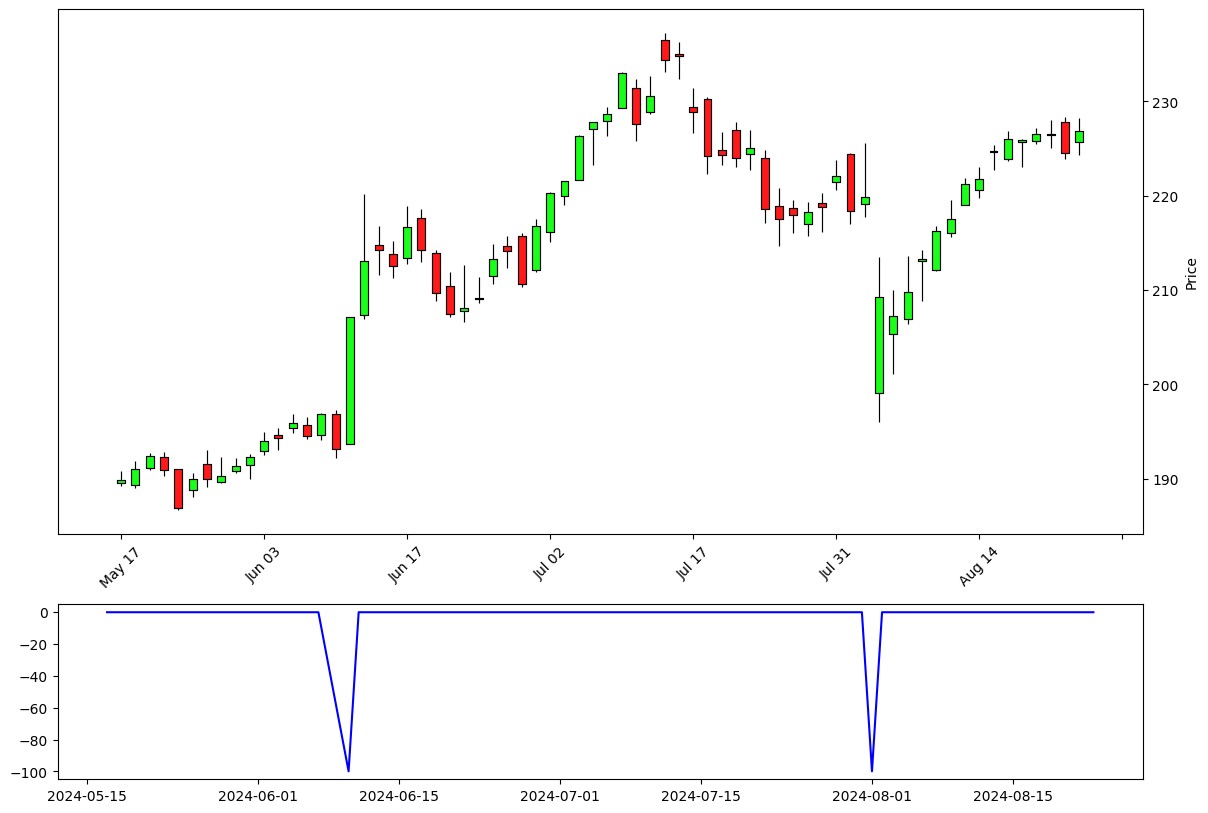

In [88]:
fig, axs = plt.subplots(
    2, 
    1, 
    gridspec_kw = {"height_ratios": [3, 1]},
    figsize = (14, 10)
)

colors = mpf.make_marketcolors(
    up="#00ff00",
    down="#ff0000"
)

mpf_style = mpf.make_mpf_style(
    base_mpf_style="yahoo",
    marketcolors = colors
)

mpf.plot(stock_movs, type="candle", ax=axs[0], style=mpf_style)
axs[1].plot(stock_movs["Engulfing"], color="blue")